In [45]:
import numpy as np
from sklearn.metrics import auc

def roc(sim, obs, percentile=20):
    sim = np.abs(sim)
    obs = np.abs(obs)
    
    sim_per = np.percentile(sim, percentile)
    obs_per = np.percentile(obs, percentile)
    
    over_per = sum(obs > obs_per)
    under_per = sum(obs <= obs_per)
    
    hit_count = 0
    false_count = 0
    for p in range(len(obs)):
        if sim[p] > sim_per and obs[p] > obs_per:
            hit_count += 1
        elif sim[p] > sim_per and obs[p] <= obs_per:
            false_count += 1
    
    hr = hit_count/over_per
    far = false_count/under_per
    return hr, far

def auc_calc(sims, obses):
    result = [[0,0]]
    
    per_list = np.arange(10, 100, 10)
    per_list = per_list[::-1]
    
    for i in per_list:
        hr_all, far_all = [], []
        for j in range(len(obses)):
            hr_n, far_n = roc(sims[j], obses[j], percentile=i)
            hr_all.append(hr_n)
            far_all.append(far_n)
        hr, far = np.mean(hr_all), np.mean(far_all)
        result.append([hr, far])
    
    result.append([1,1])
    result = np.array(result)
    return result

In [46]:
import matplotlib.pyplot as plt

def draw_roc_curve(roc):
    # calculate auc
    fpr = roc[:, 1]
    tpr = roc[:, 0]
    AUC = auc(fpr, tpr)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    plt.plot(fpr,
             tpr,
             label=f"svd ROC curve (AUC = {AUC})",
             color="blueviolet",
             linestyle=":",
             linewidth=4)
    plt.scatter(fpr, tpr, marker='d', s=100, color='blue')
    
    plt.plot([0,1],
             [0,1],
             "k--",
             label="ROC curve for chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

In [47]:
import pickle

# データセットのロード
# y_val
mode = 30
testdir = '/docker/mnt/d/research/D2/cnn3/test'
val_path = testdir + '/continuous/seed1_predictors_coarse_std_Apr_msot-pr_1x1_std_MJJASO_thailand.pickle'
with open(val_path, 'rb') as f:
    data = pickle.load(f)
y_val, val_dct = data['y_val'], data['val_dct']
val_model, val_year = val_dct['model'], val_dct['year'] # validationモデルと年のdict

# pred_val
pred_path = f"/docker/mnt/d/research/D2/cnn3/result/svd/thailand/1x1/seed1_mode{mode}.npy"
pred_val = np.load(pred_path)

# pred_val_norm, y_val_norm
pred_norm_path = f"/docker/mnt/d/research/D2/cnn3/result/svd/thailand/1x1/seed1_mode{mode}_norm.pickle"
with open(pred_norm_path, 'rb') as f:
    data = pickle.load(f)
pred_val_norm, y_val_norm = data['pred_val_norm'], data['y_val_norm']

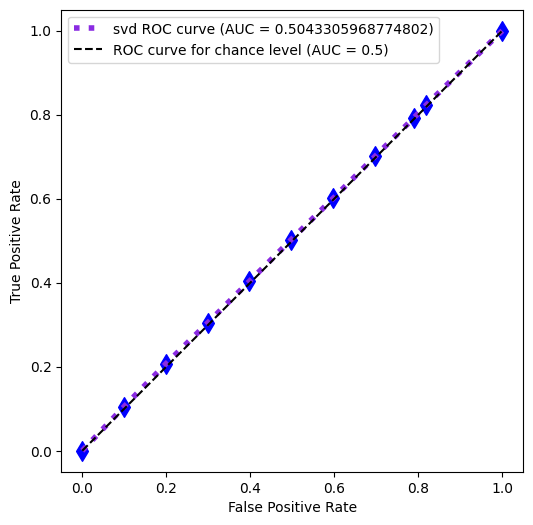

In [48]:
# 普通バージョンのプロット
roc_reg = auc_calc(pred_val, y_val)
draw_roc_curve(roc_reg)

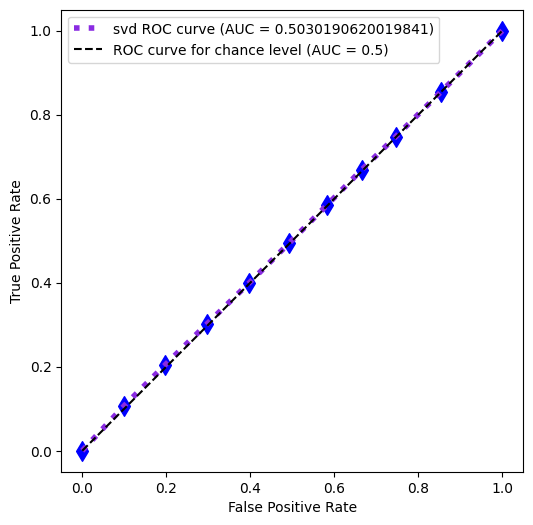

In [49]:
roc_norm = auc_calc(pred_val_norm, y_val_norm)
draw_roc_curve(roc_norm)